<a href="https://colab.research.google.com/github/MK316/pketa22/blob/main/Demo_lessons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐬 Topic: A class example (Week 10, Spring 2022)

Table of contents: 
- Gathering texts
- Wordcloud
- Natural Laguage Processing: frequency, collocations, N-grams


💾 Texts from the chapters 1~6:
[Ch01](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/Ch01.Visual.Village.txt), [Ch02](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/Ch02_Living%20light.txt), [Ch03](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/Ch03B.txt), [Ch05](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/Ch05.txt) & [Ch06](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/Ch06.txt)

# 1. Gathering texts

In [88]:
#@markdown 🌱 How many texts (chapters) to combine?
num_of_texts = "5"  #@param ["1","2","3","4","5"]
#@markdown - Note1: An empty box will pop-up and wait for your action to paste.)  
#@markdown - Note2: Each text is also stored in df (= dataframe: e.g., csv format): text1, text2, etc.)

import pandas as pd

numtexts = int(num_of_texts)
text = str()
text_number = []
texts = []
N_of_words = []

df = pd.DataFrame()


for i in range(1, numtexts+1):
  print('▶️ Paste your text; ')
  t1 = input()
  tn = 'text'+str(i)
  text_number.append(tn)
  texts.append(t1)
  tn = len(t1.split())
  N_of_words.append(tn)


  text = text + " " + str(t1)
  total = text
  if i < (numtexts+1):
    i = i+1
  else:
    text = total
  
df['Text_num'] = text_number
df['N_of_words'] = N_of_words
df['Text'] = texts
print("\n⛄ Total length: %d"%len(total))



split_text = text.split(" ")
print("⛄ The total number of words: %d"%len(split_text))

▶️ Paste your text; 
Before the age of the smartphone, aspiring photographers had to learn how to use high-tech cameras and photographic techniques. Not everyone had cameras, and it took skill and a good eye to capture and create a great photograph. Today, with the huge range of camera apps on our smartphones, we are all amateur photographers. And pretty good ones, too: The quality of smartphone images now nearly equals that of digital cameras.  The new ease of photography has given us a tremendous appetite for capturing the magical and the ordinary. We are obsessed with documenting everyday moments, whether it’s a shot of our breakfast, our cat – or our cat’s breakfast. And rather than collect pictures in scrapbooks, we share, like, and comment on them with friends and strangers around the globe.  Even photojournalists are experimenting with cell phones because their near invisibility makes it easier to capture unguarded media. They can now act as their own publishers – reaching huge 

In [89]:
#@markdown 🌱 Show the dataframe (csv format)

#@markdown data = df
display(df)

,Text_num,N_of_words,Text
0,text1,785,"Before the age of the smartphone, aspiring pho..."
1,text2,577,"The ability of some species to create light, k..."
2,text3,854,Genetic engineering (GE) of crops and animals ...
3,text4,1007,"Everybody loves a good story, and when it's fi..."
4,text5,1002,"About 9,500 years ago, ancient accountants in ..."


To skip to combine the text, run the following code (bring the csv file from github)

In [ ]:
url = "https://raw.githubusercontent.com/MK316/pketa22/main/text_total.csv"
df = pd.read_csv(url, index_col=0)
print(df.head(5))

In [59]:
#@markdown 🌱 Show individual text
textnumber = "2" #@param ["1","2","3","4","5"]
n = int(textnumber)

print("Length (characters): %d"%len(df['Text'][n-1]))
print("🔎 Text%d: \n"%n)
df['Text'][n-1]

Length (characters): 3368
🔎 Text2: 



'The ability of some species to create light, known as bioluminescence, is both magical and commonplace. Magical, because of its glimmering beauty. Commonplace, because many life forms can do it. On land the most familiar examples are fireflies, flashing to attract mates on a warm summer night. But there are other luminous land organisms, including glow-worms, millipedes, and some ninety species of fungus. Even some birds, such as the Atlantic puffin, have beaks that glow in the dark. But the real biological light show takes place in the sea. Here, an astonishing number of beings can make light. Some, such as ostracods, are like ocean fireflies, using flashes of light to attract mate. There are also glowing bacteria, and light-making fish, squid, and jellyfish. Indeed, of all the groups of organisms known to make light, more than four-fifths live in the ocean. As a place to live, the ocean has a couple of peculiarities. Firstly, there is almost nowhere to hide, so being invisible is ve

# 2. Wordcloud of a text:

Number of texts avaliable: 1~5


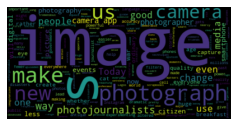

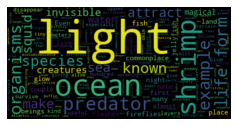

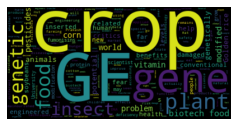

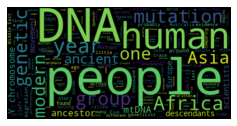

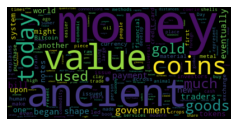

In [60]:
#@markdown Wordcloud to compare:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

print("Number of texts avaliable: 1~%d"%int(num_of_texts))

tn = int(num_of_texts)

import numpy as np
import matplotlib.pyplot as plt

for i in range(0, int(num_of_texts)):
  mytext = df['Text'][i]
# Create and generate a word cloud image:
  wordcloud = WordCloud().generate(mytext)

# Display the generated image:
  fig = plt.figure(figsize=(4, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


More references: [wordcloud shapes](https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/)

# 3. Natural Language Processing {nltk}

## [1] Import {nltk} library
- NLTK contains "stopwords" list

In [61]:
#@markdown 📕 Import packages {nltk}
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download("punkt")
from nltk.tokenize import RegexpTokenizer

# import stopwords from nltk.corpus

from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['us']
new_stopwords_list = stop_words.union(new_stopwords)

print("⛄ Stopword list: %s"%len(new_stopwords_list))
print("\n⛄ Stopword list: %s"%new_stopwords_list)

⛄ Stopword list: 180

⛄ Stopword list: {'myself', "wasn't", 'himself', 'doing', 'here', 'how', 'few', 'ain', "isn't", 'some', 'into', 'do', "couldn't", "mightn't", 'about', 'ours', "needn't", "you're", 'no', 'was', 'on', 'why', 'with', 'ma', 'then', 'y', 'our', 'before', 'in', 'if', 'shouldn', 'further', "hadn't", "you've", 'don', "aren't", 'other', 'weren', "didn't", 'won', "don't", 'them', 'o', 'she', 'the', 'is', 'am', 'he', 'be', 'up', 'm', 'their', 'very', 'aren', 'theirs', 'these', 'does', "won't", "weren't", 'for', 'your', 'between', 'below', 'once', 'themselves', 'me', 'of', 'down', 'nor', 't', 'isn', 'should', 'too', 'and', 'needn', "shouldn't", 'that', 'again', 'yours', 'until', 'has', 'now', 'having', 'us', 'by', 'been', "that'll", "you'd", 'over', 'there', 'same', 'being', 'whom', "mustn't", 'yourself', 'more', "she's", 'each', 'hasn', 'so', 's', "you'll", 'a', 'didn', 'her', 'they', 'haven', 'hers', 'than', 'had', 'did', 'because', 'above', 'have', 'out', 'most', 'when', "

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## [2] Preprocessing & Word Frequency: 
- removing stop words, 
- selecting words with more than 3 characters

In [62]:
#@markdown 📕 Preprocessing Remove stopwords, numbers, < 2 character words
import re
text = text.lower()
retokenize =RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

numbers = re.findall('[0-9]+[0-9]+',text)
words = [w for w in words if not w in numbers]
words = [w for w in words if len(w) > 2]

#@markdown - Tokenized words after filtering stop words & words with more than 3 letters:
print('⛄ Number of words before stopwords: %d'%len(words))
words = [w for w in words if not w in new_stopwords_list]
print('⛄ Number of words after stopwords: %d'%len(words))


⛄ Number of words before stopwords: 3433
⛄ Number of words after stopwords: 2354


In [63]:
#@markdown Save the frequency total as 'freqlist_total.csv'
#@markdown - data = df0
#@markdown - Show final 5 items.
import pandas as pd

fd = nltk.FreqDist(words).most_common()
df0 = pd.DataFrame()
wlist = []
freq = []
n = len(fd)
for i in range(0,n):
  wlist.append(fd[i][0])
  freq.append(fd[i][1])

df0['ID'] = range(1,n+1)
df0['Words'] = wlist
df0['Freq'] = freq

df0.to_csv(r'/content/freqlist_total.csv',index=False)

df0.tail()

,ID,Words,Freq
1293,1294,wealthiest,1
1294,1295,street,1
1295,1296,financier,1
1296,1297,exerts,1
1297,1298,influence,1


In [64]:
#@markdown 🌱  Frequency distribution 
number_of_words = "10" #@param ["10","20","30","50","100"]
n = int(number_of_words)

fd = nltk.FreqDist(words).most_common(n)
print(fd[:10])

import pandas as pd

df1 = pd.DataFrame()
wlist = []
freq = []

for i in range(0,n):
  wlist.append(fd[i][0])
  freq.append(fd[i][1])

df1['ID'] = range(1,n+1)
df1['Words'] = wlist
df1['Freq'] = freq

print(df[:n])
#@markdown - Data = df1
#@markdown - Frequency wordlist will be saved as, e.g., 'freqlist_30.csv'
df1.to_csv(r'/content/freqlist_%d.csv'%n,index=False)

[('light', 22), ('people', 20), ('money', 19), ('ancient', 14), ('new', 13), ('one', 13), ('genetic', 13), ('dna', 13), ('today', 12), ('make', 12)]
  Text_num  N_of_words                                               Text
0    text1         785  Before the age of the smartphone, aspiring pho...
1    text2         577  The ability of some species to create light, k...
2    text3         854  Genetic engineering (GE) of crops and animals ...
3    text4        1007  Everybody loves a good story, and when it's fi...
4    text5        1002  About 9,500 years ago, ancient accountants in ...


In [66]:
#@markdown 🌱  Words with frequency greater than N
occurrences = "20" #@param ["3", "5","7","10","15","20"]
n = int(occurrences)


fd = nltk.FreqDist(words).most_common()
# print(fd[:5])

import pandas as pd

#@markdown data = df2
df2 = pd.DataFrame()
wlist = []
freq = []

for i in range(0,len(fd)):
  if fd[i][1] > n-1:
     wlist.append(fd[i][0])
     freq.append(fd[i][1])
df2['Words'] = wlist
df2['Freq'] = freq

print("⛄ Words occurring more than %s times:\n"%n)
print(df2)


⛄ Words occurring more than 20 times:

    Words  Freq
0   light    22
1  people    20


## [3A] Words in context

In [67]:
#@markdown 📕 Import packages {nltk.sent_tokenize}
%%capture
from nltk import sent_tokenize
nltk.download("punkt")
sents = nltk.sent_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:
#@markdown 🌱  Find sentences with a specific word: pop-up window
import re

word_to_search = input()
w = str(word_to_search)

results = [s for s in sents if bool(re.findall(w,s)) == 1 ]

for i in range(0, len(results)):
  n = i+1
  print('Occurrence %d: '%n)
  s = results[i]
  print(s[0].capitalize()+s[1:])

find
Occurrence 1: 
In the past 20 years, however, dna technologies have allowed scientists to find a record of ancient human migrations in the dna of living people.
Occurrence 2: 
Generations later, finding that same mutation in two people's dna indicates that they share the same ancestor.


## [3B] Words in context: Concordance

In [70]:
#@markdown 🌱 Collocation: words in context
import re

#@markdown => What you need to do: _Type a word to search in a pop-up window:_ e.g., light, get, make, etc.
target = input()
lowerword = text.lower()
nltk.Text(lowerword).collocations()
words1 = text.split()
nltk.Text(words1).concordance(target, 100, 10)

get

Displaying 4 of 4 matches:
s instagram. a photograph taken in new york can get a response from someone in lagos within a secon
power to do the same. many members of the media get stuck on the same stories, focusing on election
eople from various populations, geneticists can get a rough idea of where and when those groups sep
like walking a little farther down the beach to get away from the crowd." archeological evidence of


## [4] N-gram: finding colloquial expressions

In [71]:
#@markdown 🚩 ngram(N_gram, show_topN):
import nltk
# nltk.download('gutenberg')
from nltk.tokenize import word_tokenize
from nltk import ngrams

N_gram = "4" #@param [2,3,4,5,6]
show_topN = "5" #@param [5, 10, 20, 30, 40]

def ngram(x, y):

  # ngram_num = input()
  # ngram_num = int(ngram_num)

  # text_to_choose = "bible-kjv.txt"  #@param ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
  # ngram_number = "6" #@param [2, 3, 4, 5, 6, 7]
  # n = int(ngram_number)
  # show_nth_in_frequency_list = "5" #@param [5, 10, 15, 20]
  # n1 = int(show_nth_in_frequency_list)

  # text = nltk.corpus.gutenberg.raw(text_to_choose)
  ngram = ngrams(text.split(),x)

  gramdata = []

  for grams in ngram:
    gramdata.append(grams)
  num = len(gramdata)

  fd = nltk.FreqDist(gramdata).most_common(int(y))
  return fd

x = int(N_gram)
y = int(show_topN)
ngram(x,y)


[(('on', 'the', 'other', 'hand,'), 3),
 (('in', 'the', 'dna', 'of'), 3),
 (('tens', 'of', 'thousands', 'of'), 2),
 (('genes', 'have', 'been', 'inserted'), 2),
 (('have', 'been', 'inserted', 'into'), 2)]

## [5] Tagging: Parts of Speech 

In [73]:
# Install {corpus-toolkit}
%%capture
!pip install corpus-toolkit

In [74]:
#@markdown Step1: Making a new folder named "txtdata" for corpus toolkit
import os
os.mkdir("txtdata")

!pwd

/content


In [75]:
#@markdown Choose a text to process tagging: e.g., 1 for text1

tn = "3" #@param [1,2,3,5,6]
n = int(tn)-1

if n < 4:
  txt = df['Text'][n]
elif n >= 4:
  txt = df['Text'][n-1]

print("Text to tagging process:\n %s"%txt)

import os
os.chdir('/content/txtdata')
with open('mytext.txt', 'w') as f:
    f.write(txt)
mytext = txt
os.chdir('/content')

Text to tagging process:
 Genetic engineering (GE) of crops and animals through the manipulation of DNA is producing a revolution in food production.The potential to improve the quality and nutritional value of the food (that)  we eat seems unlimited. Such potential benefits notwithstanding, critics fear that genetically engineered products – so-called biotech foods – are being rushed to market before their effects are fully understood. On the other hand, the techniques of genetic engineering are new and different.Conventional breeders always used plants or animals that were related, or genetically similar. In so doing, they transferred tens of thousands of genes.In contrast, today’s genetic engineers can transfer just a few genes at a time between species that are distantly related, or not related at all. There are surprising example: Rat genes have been inserted into lettuce plants to make a plant that produces vitamin C. Moth genes have been inserted into apple trees to add disease 

In [76]:
#@markdown Step2: Tokenize, frequency analysis
from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
mydata = ct.frequency(mydata) #creates a frequency dictionary

ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))
tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing mytext.txt (1 of 1 files)
Processing mytext.txt (1 of 1 files)
Processing 1.txt (1 of 1 files)
the_DET	38
be_AUX	35
of_ADP	27
and_CCONJ	20
a_DET	20
in_ADP	18
to_PART	13
food_NOUN	12
that_PRON	11
crop_NOUN	10


In [86]:
#@markdown Tagged text to a dataframe(csv) df5)

import pandas as pd

data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df5 = pd.DataFrame(data_list)
df5.columns = ["Tagged","Freq"]

tagged = df5["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

# Add new columns to the dataframe

df5["POS"] = pos
df5["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df5 = df5[cols]

# Sort by POS and Freq
df5 = df5.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df5.head()

Total rows:  388


,POS,Word,Freq
184,VERB,modify,5
92,VERB,insert,4
12,VERB,produce,3
20,VERB,improve,3
26,VERB,eat,3


# Part 4. Pronouncing high-frequency wordlist

* Using gTTS (Text-To-Speech)

In [78]:
#@markdown 🚩 {gTTS} package installation and import
%%capture
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

In [79]:
#@markdown 🚩 Getting ready to use { tts ( _text_to_say_) }:
def tts(mytext):

#Install gTTS
# !pip install gTTS
# from gtts import gTTS
# from IPython.display import Audio

  text_to_say = mytext

# Step ⓵ Language to choose:
  language_to_choose = "en" #@param ["en", "fr","ko",'es']
  # Slow_speed = False #@param [True, False]
  # lang = language_to_choose
#@markdown 🌝 Dialect to choose: "com (default)" for General American English, "co.uk" for British, "com.au" for Australian, "co.in" for Indian, "ie" for Ireland accent.  
  dialect = "co.uk" #@param ["com","co.uk","com.au","ca","co.in","ie"]
  print("Play language accent: %s"%language_to_choose)
  print("Play local accent: %s"%dialect)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language, tld = dialect,
                     slow = False)
  
# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# # Output
  return Audio("mytext.wav")

In [90]:
#@markdown 🌱 Preparing Wordlist: High frequency words 100 (saved as wtext)
Top_frequency = "5" #@param [5, 10, 20, 30, 50, 100]
n = int(Top_frequency)
wlist = df0['Words'][:n]
# wid = df5['ID']
flist = []
for n in range(0, len(wlist)):
  word_with_num = "Number" + str(n+1) + ", " + str(wlist[n])
  flist.append(word_with_num)

wtext = '! '.join(flist)
intro = "Let me say %d frequently used words in our text. "%n
wtext = intro + wtext
wtext

tts(wtext)


Play language accent: en
Play local accent: co.uk


In [91]:
#@markdown 🌱 Read a chapter for me:   

#@markdown Q. _Which text do you want me to read?_ (e.g., 1 for text1)
tn = input()
tn = int(tn)

tn1 = text+str(tn)
text_to_read = df['Text'][tn-1]
tts(text_to_read)

2
Play language accent: en
Play local accent: co.uk


In [92]:
df.head()

,Text_num,N_of_words,Text
0,text1,785,"Before the age of the smartphone, aspiring pho..."
1,text2,577,"The ability of some species to create light, k..."
2,text3,854,Genetic engineering (GE) of crops and animals ...
3,text4,1007,"Everybody loves a good story, and when it's fi..."
4,text5,1002,"About 9,500 years ago, ancient accountants in ..."


File: reading texts by paragraphs (Ch1, Ch2, Ch5)

In [93]:
#@markdown 🚩 gTTS reset to:
def tts(mytext):
  text_to_say = mytext
  language_to_choose = "en" #@param ["en", "fr","ko",'es']
#@markdown 🌝 Dialect to choose: "com (default)" for General American English, "co.uk" for British, "com.au" for Australian, "co.in" for Indian, "ie" for Ireland accent.  
  dialect = "com" #@param ["com","co.uk","com.au","ca","co.in","ie"]
  print("Play language accent: %s"%language_to_choose)
  print("Play local accent: %s"%dialect)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language, tld = dialect,
                     slow = False)

# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# Output
  return Audio("mytext.wav")

Note: paragraphed file from github (not from the text we combined)

In [94]:
#@markdown 🌱 Read paragraphs:
import pandas as pd
url = "https://raw.githubusercontent.com/MK316/workshop22/main/data/para_reading.csv"
df3 = pd.read_csv(url)
df3.head()

# Text to read

ch = "Ch02" #@param ["Ch01", "Ch02", "Ch05"]
para = "P2" #@param ["P1", "P2", "P3", "P5", "P6"]

result = df3[(df3['Chapters'] == ch) & (df3['Paragraph'] == para)]["Text"]

n = result.index[0]
mytext = df3['Text'][n]
print("Chapter to read: %s"%ch)
print("Paragraph to read: %s"%para)
print("Text to read: %s"%mytext)
tts(mytext)


Chapter to read: Ch02
Paragraph to read: P2
Text to read: But the real biological light show takes place in the sea. Here, an astonishing number of beings can make light. Some, such as ostracods, are like ocean fireflies, using flashes of light to attract mate. There are also glowing bacteria, and light-making fish, squid, and jellyfish. Indeed, of all the groups of organisms known to make light, more than four-fifths live in the ocean.
Play language accent: en
Play local accent: com
